In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
datatrain = pd.read_csv("train.csv")
df = pd.read_csv("test.csv")
datatest = pd.read_csv("test.csv")

In [ ]:
print(datatrain.columns)
print(datatest.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print(datatrain.info())
print(datatest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(datatrain.shape[1])
print(datatest.shape[1])

81
80


In [ ]:
print(datatrain.columns.get_loc("Id"))
print(datatrain.columns.get_loc("LotFrontage"))
print(datatrain.columns.get_loc("LotArea"))
print(datatrain.columns.get_loc("Street"))
print(datatrain.columns.get_loc("BsmtUnfSF"))
print(datatrain.columns.get_loc("Heating"))
print(datatrain.columns.get_loc("Electrical"))
print(datatrain.columns.get_loc("KitchenQual"))
print(datatrain.columns.get_loc("Functional"))
print(datatrain.columns.get_loc("SalePrice"))

0
3
4
5
37
39
42
53
55
80


In [ ]:
print(datatest.columns.get_loc("Id"))
print(datatest.columns.get_loc("LotFrontage"))
print(datatest.columns.get_loc("LotArea"))
print(datatest.columns.get_loc("Street"))
print(datatest.columns.get_loc("BsmtUnfSF"))
print(datatest.columns.get_loc("Heating"))
print(datatest.columns.get_loc("Electrical"))
print(datatest.columns.get_loc("KitchenQual"))
print(datatest.columns.get_loc("Functional"))

0
3
4
5
37
39
42
53
55


In [ ]:
columns_to_drop1 = datatrain.columns[0:1].tolist() + datatrain.columns[2:4].tolist() +  datatrain.columns[5:38].tolist() + datatrain.columns[39:43].tolist()  + datatrain.columns[53:54].tolist() + datatrain.columns[55:80].tolist()
datatrain.drop(columns=columns_to_drop1, inplace=True)

In [ ]:
columns_to_drop2 = datatest.columns[0:1].tolist() + datatest.columns[2:4].tolist() +  datatest.columns[5:38].tolist() + datatest.columns[39:43].tolist()  + datatest.columns[53:54].tolist() + datatest.columns[55:81].tolist()
datatest.drop(columns=columns_to_drop2, inplace=True)

In [ ]:
datatrain.columns

Index(['MSSubClass', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'SalePrice'],
      dtype='object')

In [ ]:
datatest.columns

Index(['MSSubClass', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

In [ ]:
print(datatrain.shape[1])
print(datatest.shape[1])

15
14


In [ ]:
datatrain.info()
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   LowQualFinSF  1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   BsmtFullBath  1460 non-null   int64
 8   BsmtHalfBath  1460 non-null   int64
 9   FullBath      1460 non-null   int64
 10  HalfBath      1460 non-null   int64
 11  BedroomAbvGr  1460 non-null   int64
 12  KitchenAbvGr  1460 non-null   int64
 13  TotRmsAbvGrd  1460 non-null   int64
 14  SalePrice     1460 non-null   int64
dtypes: int64(15)
memory usage: 171.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  

In [ ]:
datatrain.describe()

,MSSubClass,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,180921.195890
std,42.300571,9981.264932,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,79442.502883
min,20.000000,1300.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,20.000000,7553.500000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,129975.000000
50%,50.000000,9478.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,163000.000000
75%,70.000000,11601.500000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,214000.000000
max,190.000000,215245.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,755000.000000


In [ ]:
datatest.describe()

,MSSubClass,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195
std,42.746880,4955.517327,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895
min,20.000000,1470.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,20.000000,7391.000000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000
50%,50.000000,9399.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000
75%,70.000000,11517.500000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000
max,190.000000,56600.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000


In [ ]:
print(datatrain.isnull().sum())
print(datatest.isnull().sum())

MSSubClass      0
LotArea         0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64
MSSubClass      0
LotArea         0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64


In [ ]:
num_features = datatest.select_dtypes(include=[np.number]).columns
num_imputer = SimpleImputer(strategy='mean')
datatest[num_features] = num_imputer.fit_transform(datatest[num_features])

In [ ]:
missing_values = datatest.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


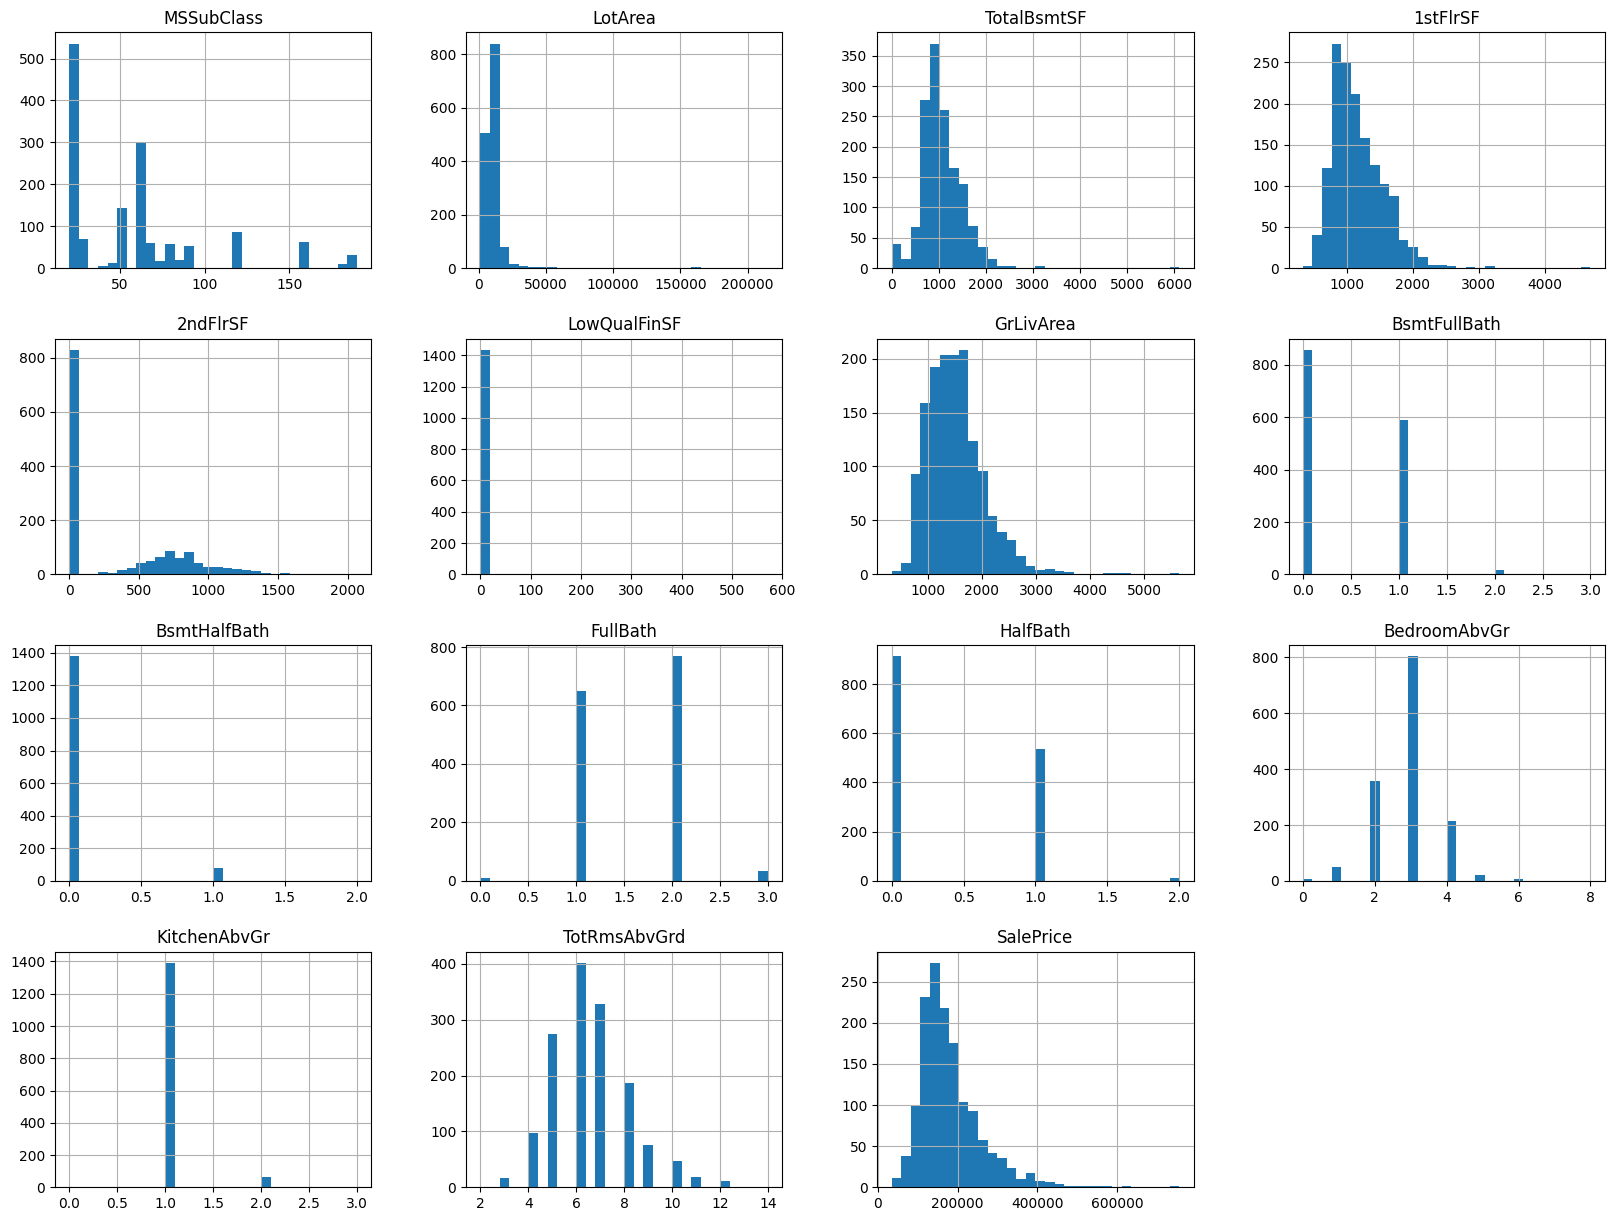

In [ ]:
datatrain.hist(bins=30, figsize=(20, 15))
plt.show()

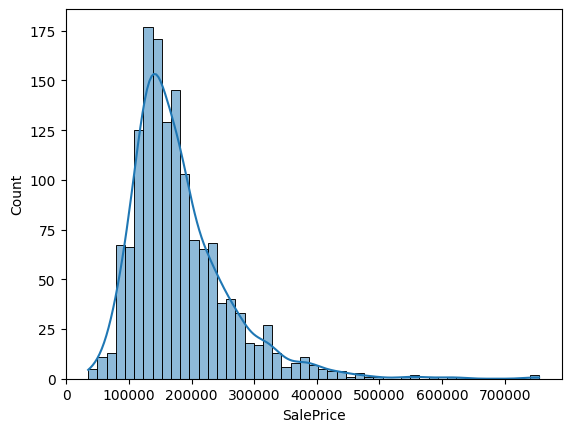

In [ ]:
sns.histplot(datatrain['SalePrice'], kde=True)
plt.show()

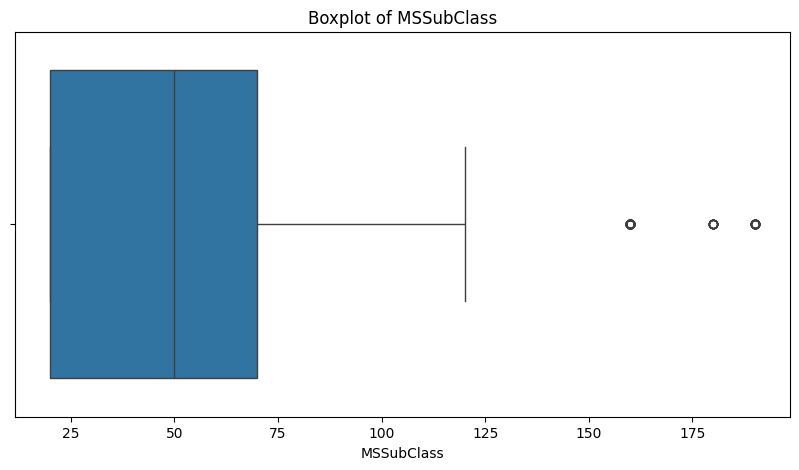

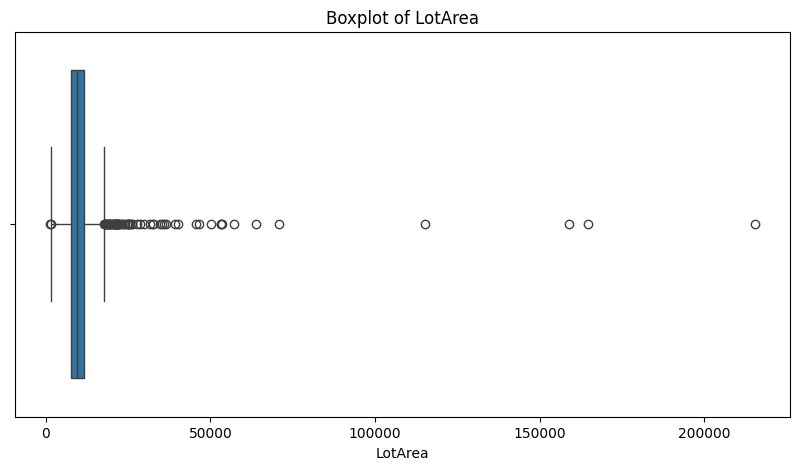

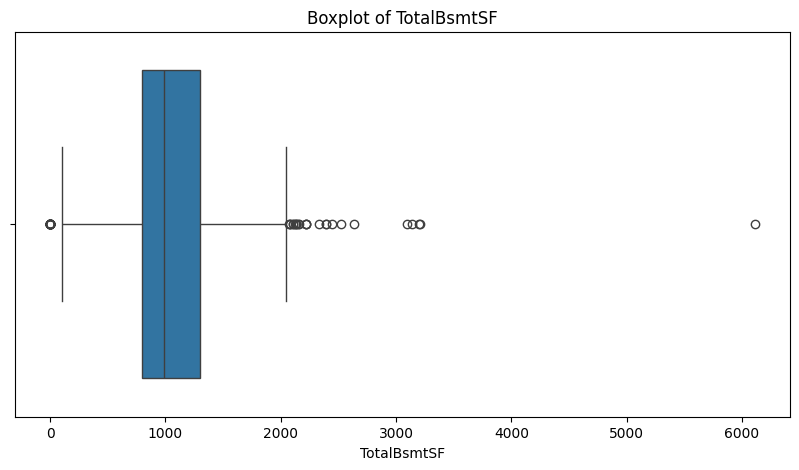

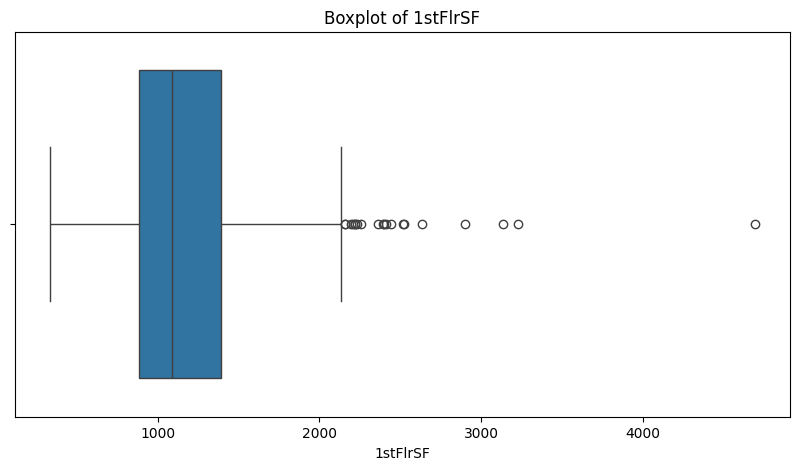

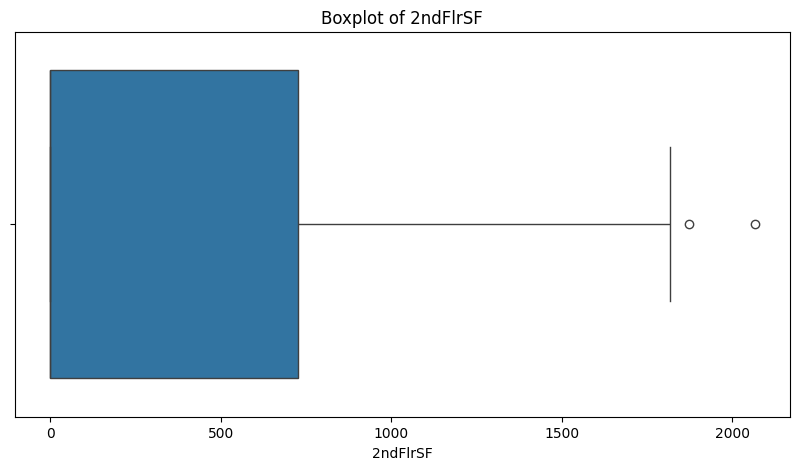

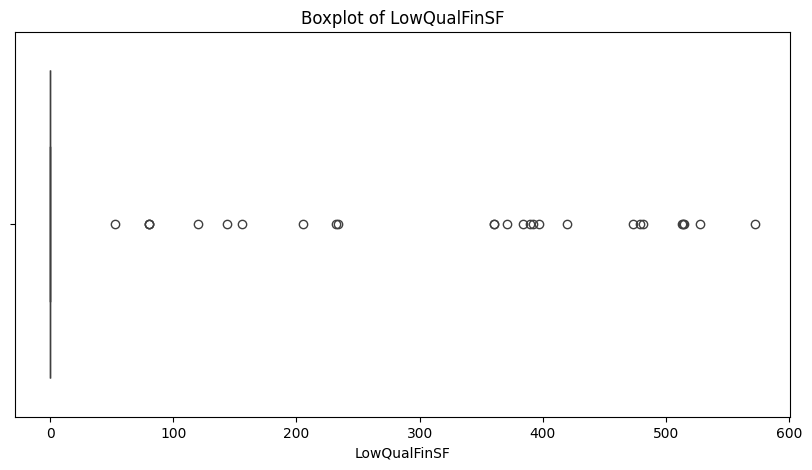

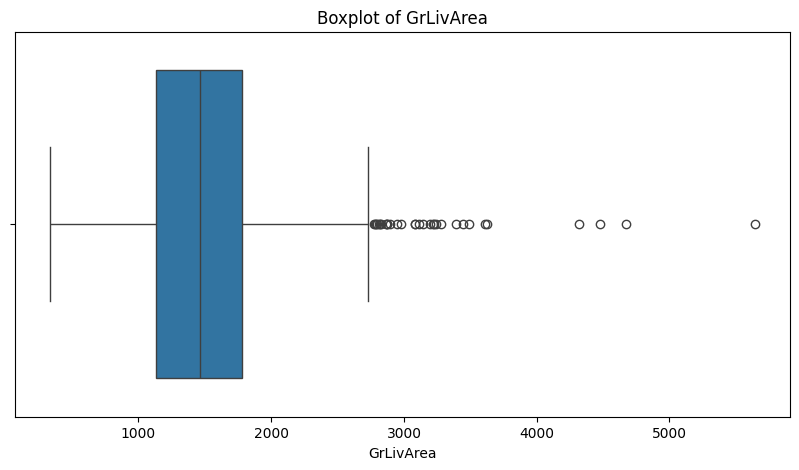

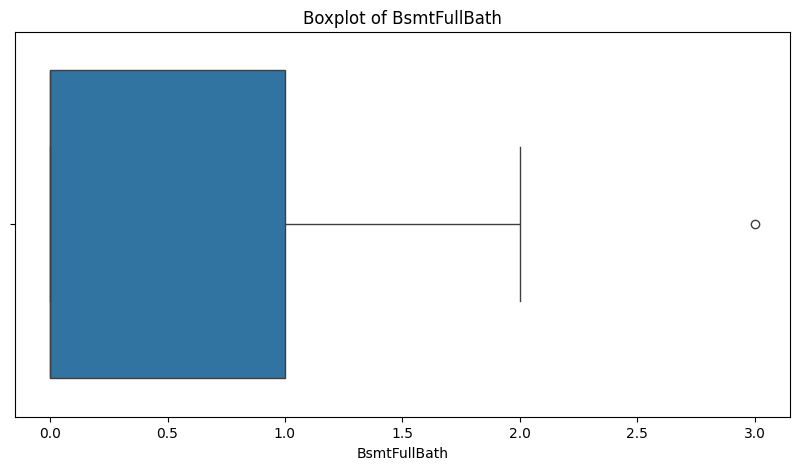

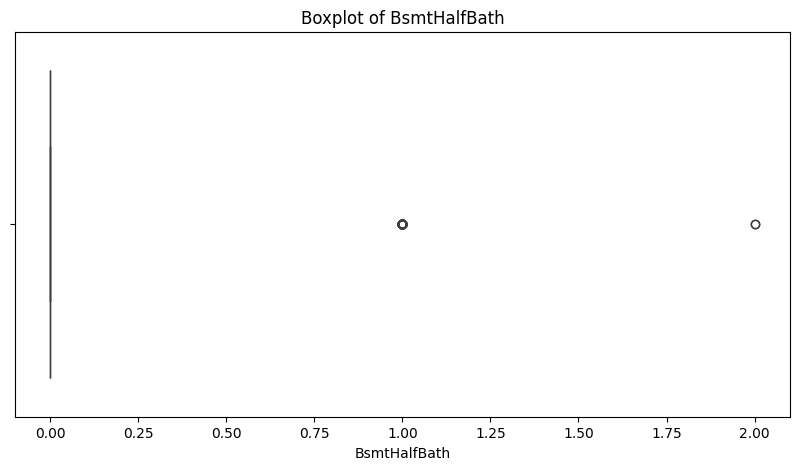

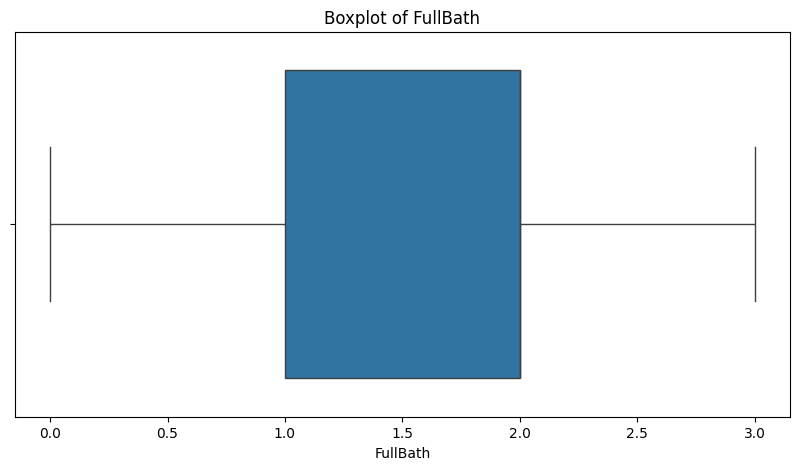

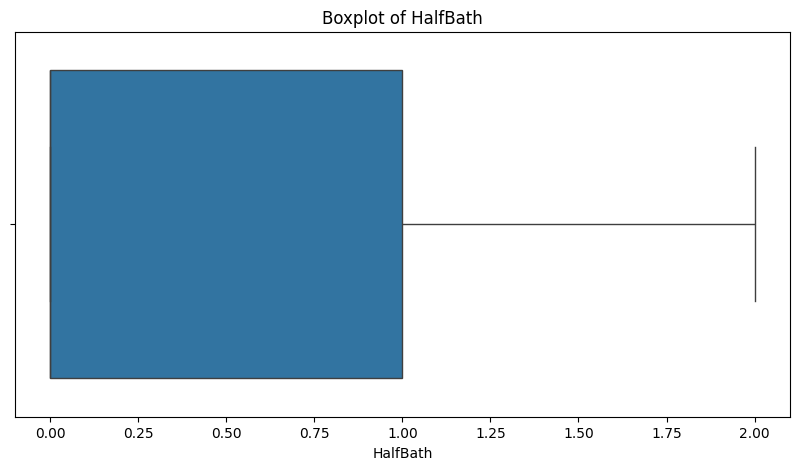

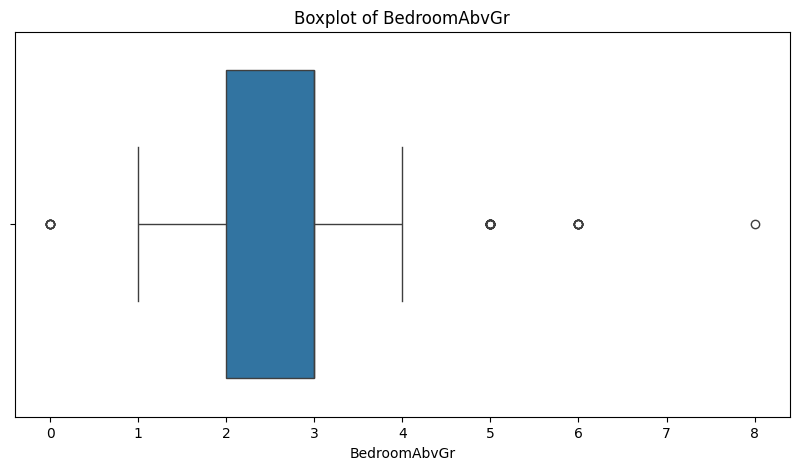

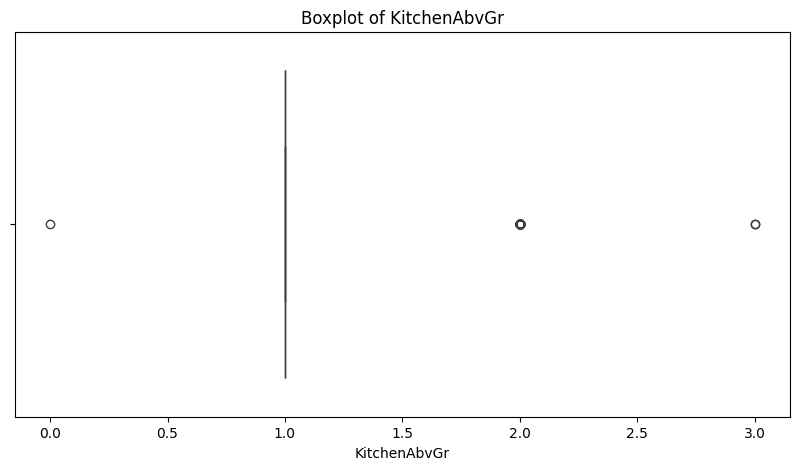

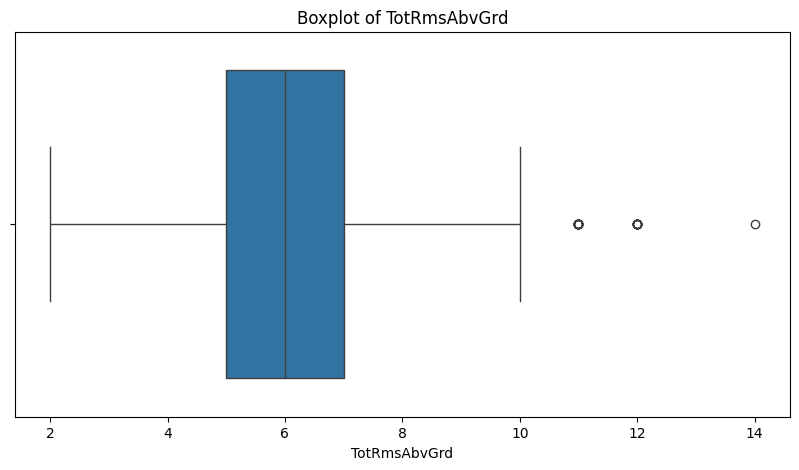

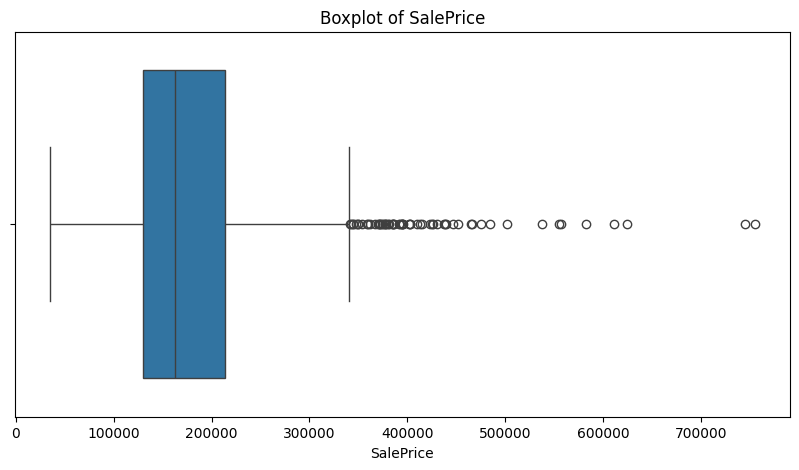

In [ ]:
for column in datatrain.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=datatrain[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

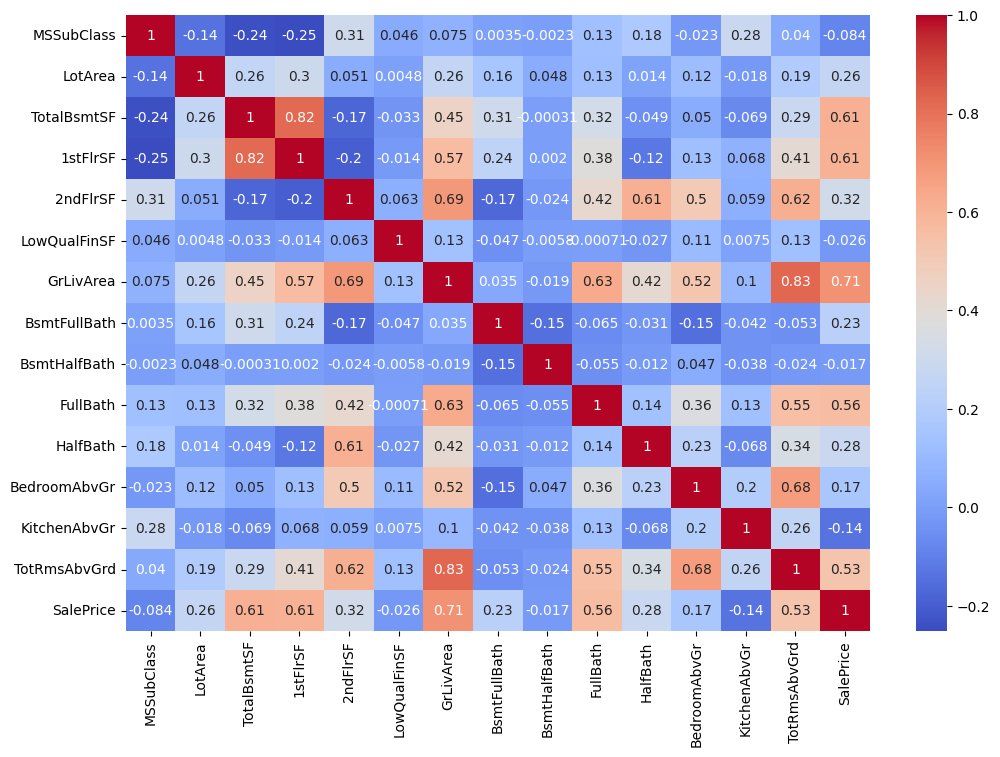

In [ ]:
corr_matrix = datatrain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
low_correlation_features=corr_matrix[corr_matrix['SalePrice'] < 0.2].index
datatrain.drop(low_correlation_features, axis=1, inplace=True)

low_correlation_features

Index(['MSSubClass', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr'],
      dtype='object')

In [ ]:
datatest.drop(low_correlation_features, axis=1, inplace=True)

In [ ]:
target = 'SalePrice'
X_train = datatrain.drop(columns=[target])
y_train = datatrain[target]

In [ ]:
X_test = datatest

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
cv_scores=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
cv_scores = -cv_scores

In [ ]:
print("Cross-validation scores (MSE):", cv_scores)
print("Mean cross-validation score (MSE):", cv_scores.mean())
mse_simple = cv_scores.mean()

Cross-validation scores (MSE): [1.52537926e+09 2.04425509e+09 1.40671944e+09 2.88493047e+09
 2.62862799e+09 1.64638449e+09 1.68472275e+09 1.49128913e+09
 5.89554809e+09 1.57044292e+09]
Mean cross-validation score (MSE): 2277829961.820529


In [ ]:
reg_pred=regression.predict(X_test)

In [ ]:
reg_pred

array([103323.06897804, 177979.02251275, 199164.47903888, ...,
       159486.32243414, 107366.21000084, 216443.79364032])

In [ ]:
ridge_regressor=Ridge()

In [ ]:
parameters={'alpha':[5,10,20,50,70,90,100,120,150,180]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [5, 10, 20, 50, 70, 90, 100, 120, 150, 180]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 90}


In [ ]:
print(ridgecv.best_score_)

-2274213355.0298033


In [ ]:
ridge_pred=ridgecv.predict(X_test)

In [ ]:
cv_scores=cross_val_score(Ridge(alpha=90),X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
cv_scores = -cv_scores

In [ ]:
print("Cross-validation scores (MSE ridge):", cv_scores)
print("Mean cross-validation score (MSE ridge):", cv_scores.mean())
mse_ridge = cv_scores.mean()

Cross-validation scores (MSE ridge): [1.53005003e+09 1.91937734e+09 1.44427242e+09 2.81783506e+09
 2.73086902e+09 1.66750093e+09 1.72706414e+09 1.52586960e+09
 5.68337239e+09 1.59678277e+09]
Mean cross-validation score (MSE ridge): 2264299370.097364


In [ ]:
lasso=Lasso()

In [ ]:
parameters={'alpha':[5,10,20,50,70,90,100,120,150,180]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.641e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.261e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.317e+09, tolerance: 7.592e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5, 10, 20, 50, 70, 90, 100, 120, 150, 180]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 100}
-2277586983.9106674


In [ ]:
lasso_pred=lassocv.predict(X_test)

In [ ]:
cv_scores=cross_val_score(Lasso(alpha=90),X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
cv_scores = -cv_scores

In [ ]:
print("Cross-validation scores (MSE lasso):", cv_scores)
print("Mean cross-validation score (MSE lasso):", cv_scores.mean())
mse_lasso = cv_scores.mean()

Cross-validation scores (MSE lasso): [1.52450172e+09 1.93203359e+09 1.40885774e+09 2.87685494e+09
 2.64347496e+09 1.64794059e+09 1.69311124e+09 1.49881628e+09
 5.88856137e+09 1.57287092e+09]
Mean cross-validation score (MSE lasso): 2268702333.2723994


In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet_regressor=ElasticNet()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,120,150,200],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elasticnetcv=GridSearchCV(elasticnet_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
elasticnetcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   120, 150, 200],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
print(elasticnetcv.best_params_)
print(elasticnetcv.best_score_)

{'alpha': 1, 'l1_ratio': 0.9}
-2274729590.63786


In [ ]:
elasticnet_pred=elasticnetcv.predict(X_test)

In [ ]:
cv_scores=cross_val_score(ElasticNet(alpha=1.0, l1_ratio=0.9),X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
cv_scores = -cv_scores

In [ ]:
print("Cross-validation scores (MSE elasticnet):", cv_scores)
print("Mean cross-validation score (MSE elasticnet):", cv_scores.mean())
mse_elasticnet = cv_scores.mean()

Cross-validation scores (MSE elasticnet): [1.72426901e+09 2.12469283e+09 2.28201836e+09 1.63577461e+09
 3.60689314e+09]
Mean cross-validation score (MSE elasticnet): 2274729590.63786


In [ ]:
# Calculating RMSE
rmse_simple = np.sqrt(mse_simple)
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_elasticnet = np.sqrt(mse_elasticnet)

# Output RMSE values
print(f"RMSE Simple Regression: {rmse_simple}")
print(f"RMSE Ridge Regression: {rmse_ridge}")
print(f"RMSE Lasso Regression: {rmse_lasso}")
print(f"RMSE ElasticNet Regression: {rmse_elasticnet}")


RMSE Simple Regression: 47726.616911536155
RMSE Ridge Regression: 47584.65477543537
RMSE Lasso Regression: 47630.89683464295
RMSE ElasticNet Regression: 48452.26432378851
Range of target variable: 34900 to 755000
Baseline RMSE: 79415.29188606751


In [ ]:
y_predicted = pd.DataFrame({
    'Id': df['Id'],
    'SalePrice': ridge_pred
})

y_predicted

,Id,SalePrice
0,1461,104796.987942
1,1462,178250.763509
2,1463,196969.652022
3,1464,193408.066518
4,1465,179251.972939
...,...,...
1454,2915,111605.937069
1455,2916,110482.600933
1456,2917,161926.968731
1457,2918,109991.666035
